<a href="https://colab.research.google.com/github/positivezenart/Deep-learning/blob/main/bidirectional_lstm_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional LSTM on IMDB

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2020/05/03<br>
**Last modified:** 2020/05/03<br>
**Description:** Train a 2-layer bidirectional LSTM on the IMDB movie review sentiment classification dataset.

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review


## Build the model

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

## Load the IMDB movie review sentiment data

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)



17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


## Train and evaluate the model

You can use the trained model hosted on [Hugging Face Hub](https://huggingface.co/keras-io/bidirectional-lstm-imdb) and try the demo on [Hugging Face Spaces](https://huggingface.co/spaces/keras-io/bidirectional_lstm_imdb).

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
782/782 [==============================] - 479s 605ms/step - loss: 0.1659 - accuracy: 0.9376 - val_loss: 0.3768 - val_accuracy: 0.8464
Epoch 2/10
782/782 [==============================] - 479s 613ms/step - loss: 0.0994 - accuracy: 0.9650 - val_loss: 0.4086 - val_accuracy: 0.8556
Epoch 3/10
782/782 [==============================] - 479s 613ms/step - loss: 0.0594 - accuracy: 0.9805 - val_loss: 0.5118 - val_accuracy: 0.8536
Epoch 4/10
782/782 [==============================] - 495s 633ms/step - loss: 0.0510 - accuracy: 0.9835 - val_loss: 0.5187 - val_accuracy: 0.8463
Epoch 5/10
782/782 [==============================] - 489s 625ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.6098 - val_accuracy: 0.8523
Epoch 6/10
782/782 [==============================] - 499s 638ms/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.5564 - val_accuracy: 0.8434
Epoch 7/10
782/782 [==============================] - 495s 633ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.7161 -

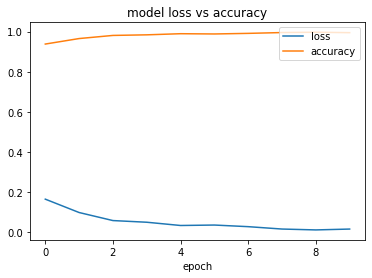

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 